# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(font_scale = 2)
# 그래프의 기본 스타일과 font크기를 설정하는 코드입니다.

In [2]:
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic') # 그래프 한글 표시 깨짐 방지
mpl.rc('axes', unicode_minus = False) # 그래프 minus 표시 깨짐 방지

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

## Name

In [4]:
df_train['Title'] = df_train['Name']\
                         .str.extract('([A-Za-z]+)\.') # 대/소문자 상관 없이 . 앞에 있는 알파벳을 추출

In [5]:
df_test['Title'] = df_test['Name']\
                         .str.extract('([A-Za-z]+)\.')
# () : 그룹으로 추출
# [] : []안의 형태에 맞는 문자를 추출
# [a-zA-Z] = [A-Za-z] : 알파벳 추출
# + : 하나 이상 추출
# \. : 문자 자체 . 

In [6]:
(pd.crosstab(df_train['Sex'], df_train['Title'])
     .style.background_gradient(cmap = 'summer_r'))

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [7]:
(pd.crosstab(df_test['Sex'], df_test['Title'])
     .style.background_gradient(cmap = 'summer_r'))

Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


Mr/Master/Mrs/Miss 알아보기!  
Mr : 남성  
Master : 소년  
Mrs : 기혼 여성  
Miss : 미혼 여성  

여기선  
Mrs/Miss 등 여성의 경칭을 하나로 통일하여 사용

In [8]:
cols = [col for col in df_train['Title'].unique() if col not in ('Mr', 'Mrs', 'Miss', 'Master') ]
for col in cols:
    print(df_train.loc[df_train['Title'] == col, ['Age', 'Sex', 'Title']])
    print('-'*20)

     Age   Sex Title
30  40.0  male   Don
--------------------
      Age   Sex Title
149  42.0  male   Rev
150  51.0  male   Rev
249  54.0  male   Rev
626  57.0  male   Rev
848  28.0  male   Rev
886  27.0  male   Rev
--------------------
      Age     Sex Title
245  44.0    male    Dr
317  54.0    male    Dr
398  23.0    male    Dr
632  32.0    male    Dr
660  50.0    male    Dr
766   NaN    male    Dr
796  49.0  female    Dr
--------------------
      Age     Sex Title
369  24.0  female   Mme
--------------------
      Age     Sex Title
443  28.0  female    Ms
--------------------
      Age   Sex  Title
449  52.0  male  Major
536  45.0  male  Major
--------------------
      Age     Sex Title
556  48.0  female  Lady
--------------------
      Age   Sex Title
599  49.0  male   Sir
--------------------
      Age     Sex Title
641  24.0  female  Mlle
710  24.0  female  Mlle
--------------------
      Age   Sex Title
647  56.0  male   Col
694  60.0  male   Col
--------------------
      A

In [9]:
cols = [col for col in df_test['Title'].unique() if col not in ('Mr', 'Mrs', 'Miss', 'Master') ]
for col in cols:
    print(df_test.loc[df_test['Title'] == col, ['Age', 'Sex', 'Title']])
    print('-'*20)

    Age     Sex Title
88  NaN  female    Ms
--------------------
      Age   Sex Title
131  53.0  male   Col
202  47.0  male   Col
--------------------
      Age   Sex Title
149  30.0  male   Rev
164  41.0  male   Rev
--------------------
      Age   Sex Title
293  53.0  male    Dr
--------------------
      Age     Sex Title
414  39.0  female  Dona
--------------------


In [10]:
df_train["Title"] = df_train["Title"].replace(['Lady', 'Countess', 'Capt','Col', 'Don',
                                               'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train["Title"] = df_train["Title"].map({"Master" : 0, "Miss" : 1, "Ms" : 1 , "Mme" : 1, 
                                           "Mlle" : 1, "Mrs" : 1, "Mr" : 2, "Rare" : 3})
df_train["Title"] = df_train["Title"].astype(int)

In [11]:
df_test["Title"] = df_test["Title"].replace(['Lady', 'Countess', 'Capt','Col', 'Don',
                                               'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test["Title"] = df_test["Title"].map({"Master" : 0, "Miss" : 1, "Ms" : 1 , "Mme" : 1, 
                                           "Mlle" : 1, "Mrs" : 1, "Mr" : 2, "Rare" : 3})
df_test["Title"] = df_test["Title"].astype(int)

[Text(0, 0, 'Master'),
 Text(0, 0, 'Miss'),
 Text(0, 0, 'Mr'),
 Text(0, 0, 'Rare')]

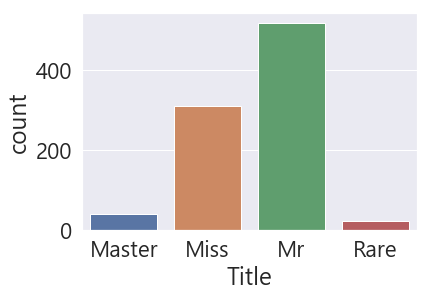

In [12]:
sns.countplot(df_train["Title"])\
    .set_xticklabels(["Master", "Miss", "Mr", "Rare"])

## Age

In [13]:
df_train.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
0,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
1,428.389068,0.739550,2.170418,27.736434,0.697749,0.655949,44.420044
2,454.499033,0.156673,2.410058,32.368090,0.288201,0.152805,24.441560
3,547.043478,0.347826,1.347826,45.545455,0.347826,0.086957,37.169748


In [14]:
df_train.loc[(df_train['Title'] == 0) & (df_train['Age'].isnull()), 'Age'] = 5
df_train.loc[(df_train['Title'] == 1) & (df_train['Age'].isnull()), 'Age'] = 28
df_train.loc[(df_train['Title'] == 2) & (df_train['Age'].isnull()), 'Age'] = 33
df_train.loc[(df_train['Title'] == 3) & (df_train['Age'].isnull()), 'Age'] = 46

In [15]:
df_test.groupby('Title').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
0,1123.380952,2.714286,7.406471,1.571429,1.380952,38.494043
1,1095.403974,2.152318,30.203095,0.569536,0.602649,49.355962
2,1101.279167,2.320833,32.000000,0.270833,0.175000,25.563302
3,1117.500000,1.333333,43.833333,0.500000,0.333333,80.963883


In [16]:
df_test.loc[(df_test['Title'] == 0) & (df_test['Age'].isnull()), 'Age'] = 8
df_test.loc[(df_test['Title'] == 1) & (df_test['Age'].isnull()), 'Age'] = 31
df_test.loc[(df_test['Title'] == 2) & (df_test['Age'].isnull()), 'Age'] = 32
df_test.loc[(df_test['Title'] == 3) & (df_test['Age'].isnull()), 'Age'] = 44

In [17]:
df_train['Age_band'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_band'] = 0
df_train.loc[(df_train['Age'] >= 10) & (df_train['Age'] < 20),'Age_band'] = 1
df_train.loc[(df_train['Age'] >= 20) & (df_train['Age'] < 30),'Age_band'] = 2
df_train.loc[(df_train['Age'] >= 30) & (df_train['Age'] < 40),'Age_band'] = 3
df_train.loc[(df_train['Age'] >= 40) & (df_train['Age'] < 50),'Age_band'] = 4
df_train.loc[(df_train['Age'] >= 50) & (df_train['Age'] < 60),'Age_band'] = 5
df_train.loc[df_train['Age'] >= 60,'Age_band'] = 6
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,3


In [18]:
df_test['Age_band'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_band'] = 0
df_test.loc[(df_test['Age'] >= 10) & (df_test['Age'] < 20),'Age_band'] = 1
df_test.loc[(df_test['Age'] >= 20) & (df_test['Age'] < 30),'Age_band'] = 2
df_test.loc[(df_test['Age'] >= 30) & (df_test['Age'] < 40),'Age_band'] = 3
df_test.loc[(df_test['Age'] >= 40) & (df_test['Age'] < 50),'Age_band'] = 4
df_test.loc[(df_test['Age'] >= 50) & (df_test['Age'] < 60),'Age_band'] = 5
df_test.loc[df_test['Age'] >= 60, 'Age_band'] = 6
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,2


## Embarked

In [19]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
df_train['Embarked'].fillna('S', inplace = True)

In [21]:
df_train['Embarked'] = df_train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [22]:
df_test['Embarked'] = df_test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

## Sex

In [23]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})

## Fare

In [24]:
df_test[['Pclass', 'Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.0000
2,15.7500
3,7.8958


In [25]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = 7.8958

In [26]:
df_train['Fare'] = np.log1p(df_train['Fare'])
df_test['Fare'] = np.log1p(df_test['Fare'])

## SibSp + Parch

In [27]:
df_train['Family'] = df_train['Parch'] + df_train['SibSp'] + 1 # 자기 자신을 포함하여
df_train['Alone'] = 0 # 0 : False / 1 : True
df_train.loc[df_train['Family'] == 1, 'Alone'] = 1

In [28]:
df_test['Family'] = df_test['Parch'] + df_test['SibSp'] + 1
df_test['Alone'] = 0
df_test.loc[df_test['Family'] == 1, 'Alone'] = 1

## Correlation

In [29]:
cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age']
df_train.drop(cols, axis = 1, inplace = True)
df_test.drop(cols, axis = 1, inplace = True)

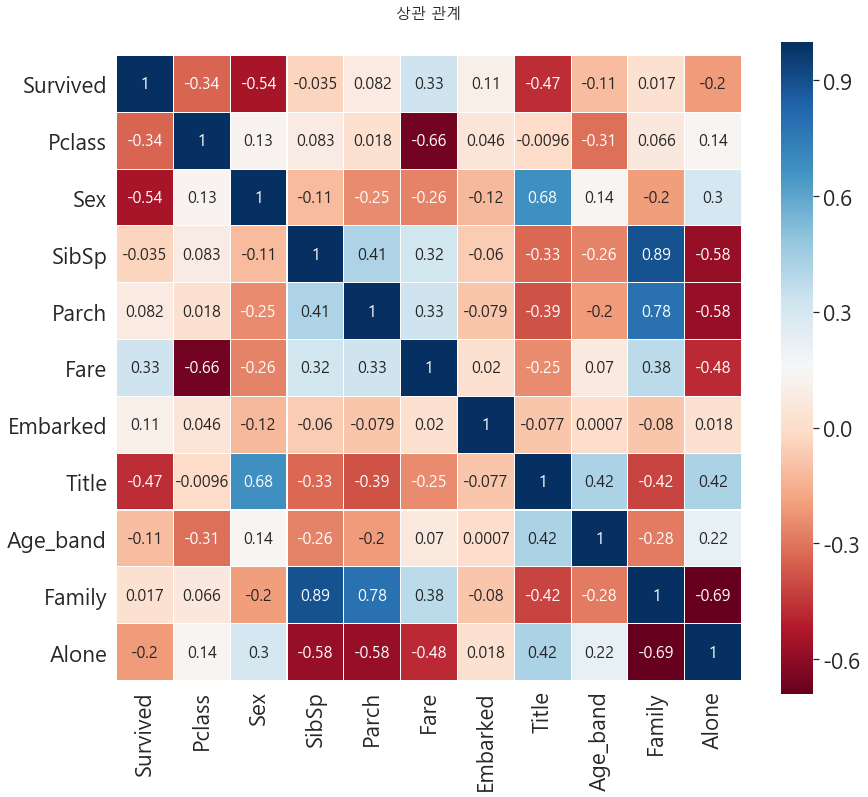

In [30]:
heatmap_data = df_train.corr()

colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('상관 관계', y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = 'white', annot = True,
           annot_kws = {'size' : 16})

## One-hot 인코딩

In [31]:
df_train = pd.get_dummies(df_train, columns = ['Title'], prefix = 'Title')
df_test = pd.get_dummies(df_test, columns = ['Title'], prefix = 'Title')

In [32]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

In [33]:
df_train.to_csv('./train.csv')
df_test.to_csv('./test.csv')